In [9]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


In [26]:
import pandas as pd
df = pd.read_csv('dataset/train_split.csv')

n_samples = int(df.shape[0])
n_features = int(df.shape[1] - 1)


print(f"Samples: {n_samples}, Features: {n_features}")
print(df.head())

Samples: 96763, Features: 22
   id   loc  v(g)  ev(g)  iv(g)     n       v     l      d      i  ...  \
0   0  22.0   3.0    1.0    2.0  60.0  278.63  0.06  19.56  14.25  ...   
1   1  14.0   2.0    1.0    2.0  32.0  151.27  0.14   7.00  21.11  ...   
2   2  11.0   2.0    1.0    2.0  45.0  197.65  0.11   8.05  22.76  ...   
3   3   8.0   1.0    1.0    1.0  23.0   94.01  0.19   5.25  17.86  ...   
4   4  11.0   2.0    1.0    2.0  17.0   60.94  0.18   5.63  12.44  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0      17          1        1                  0     16.0        9.0   
1      11          0        1                  0     11.0       11.0   
2       8          0        1                  0     12.0       11.0   
3       4          0        2                  0      8.0        6.0   
4       7          0        2                  0      7.0        6.0   

   total_Op  total_Opnd  branchCount  defects  
0      38.0        22.0          5.0    False

In [21]:
total_missing = df.isnull().sum().sum()
print("Total missing values in dataset:", total_missing)

missing_percentage = (df.isnull().sum().sum() / df.size) * 100
print("Total missing value percentage:", round(missing_percentage, 2), "%")


Total missing values in dataset: 0
Total missing value percentage: 0.0 %


In [23]:
df['defects'].value_counts()
df['defects'].value_counts(normalize=True)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96763 entries, 0 to 96762
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 96763 non-null  int64  
 1   loc                96763 non-null  float64
 2   v(g)               96763 non-null  float64
 3   ev(g)              96763 non-null  float64
 4   iv(g)              96763 non-null  float64
 5   n                  96763 non-null  float64
 6   v                  96763 non-null  float64
 7   l                  96763 non-null  float64
 8   d                  96763 non-null  float64
 9   i                  96763 non-null  float64
 10  e                  96763 non-null  float64
 11  b                  96763 non-null  float64
 12  t                  96763 non-null  float64
 13  lOCode             96763 non-null  int64  
 14  lOComment          96763 non-null  int64  
 15  lOBlank            96763 non-null  int64  
 16  locCodeAndComment  967

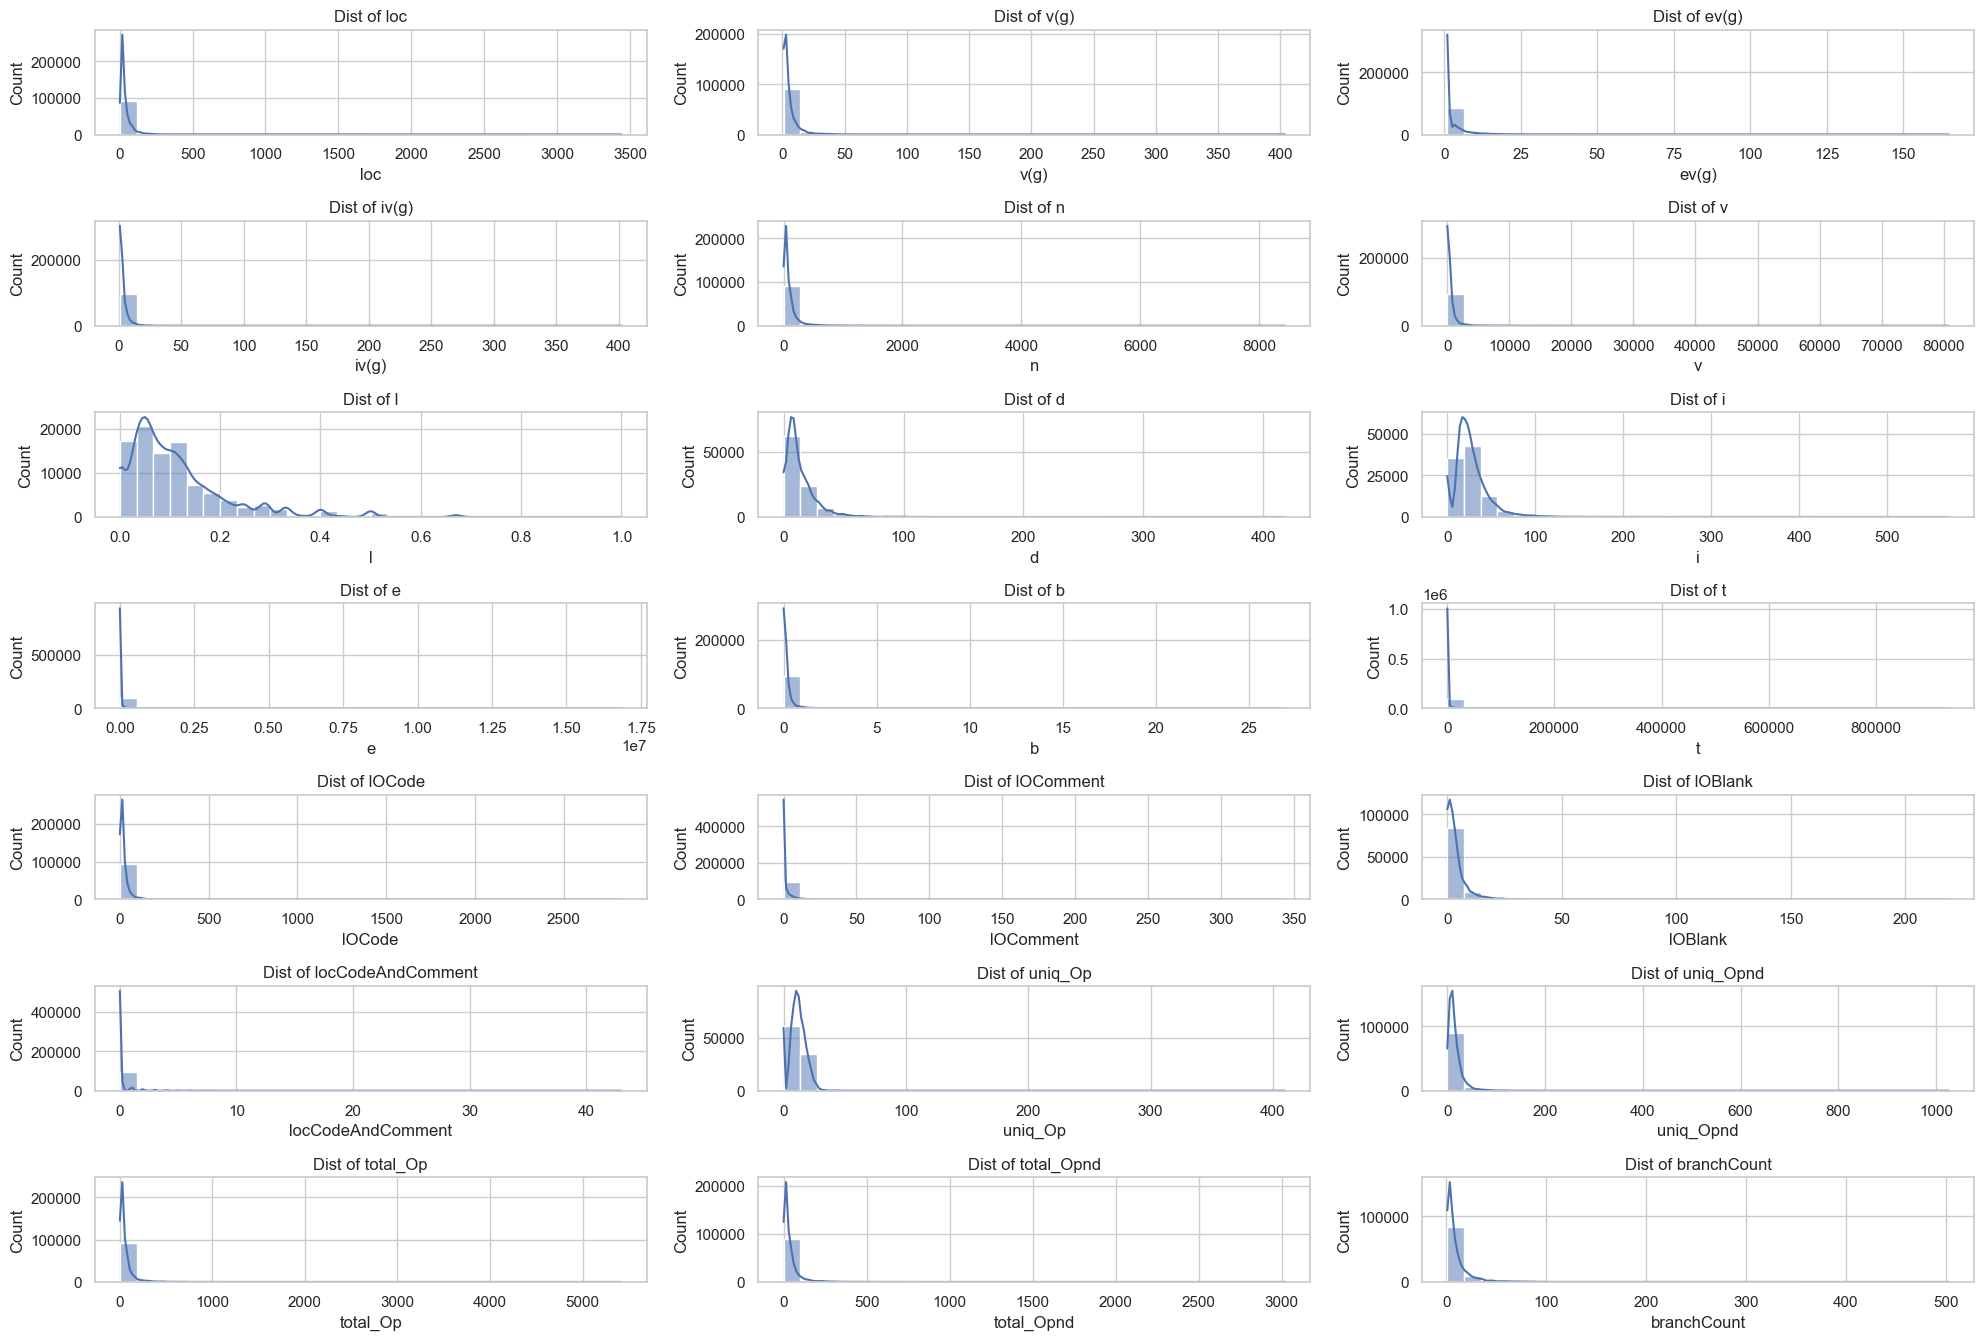

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
cols_to_plot = df.drop(columns=['id', 'defects']).columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols_to_plot):
    plt.subplot(8, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Dist of {col}')
    plt.tight_layout()

plt.show()

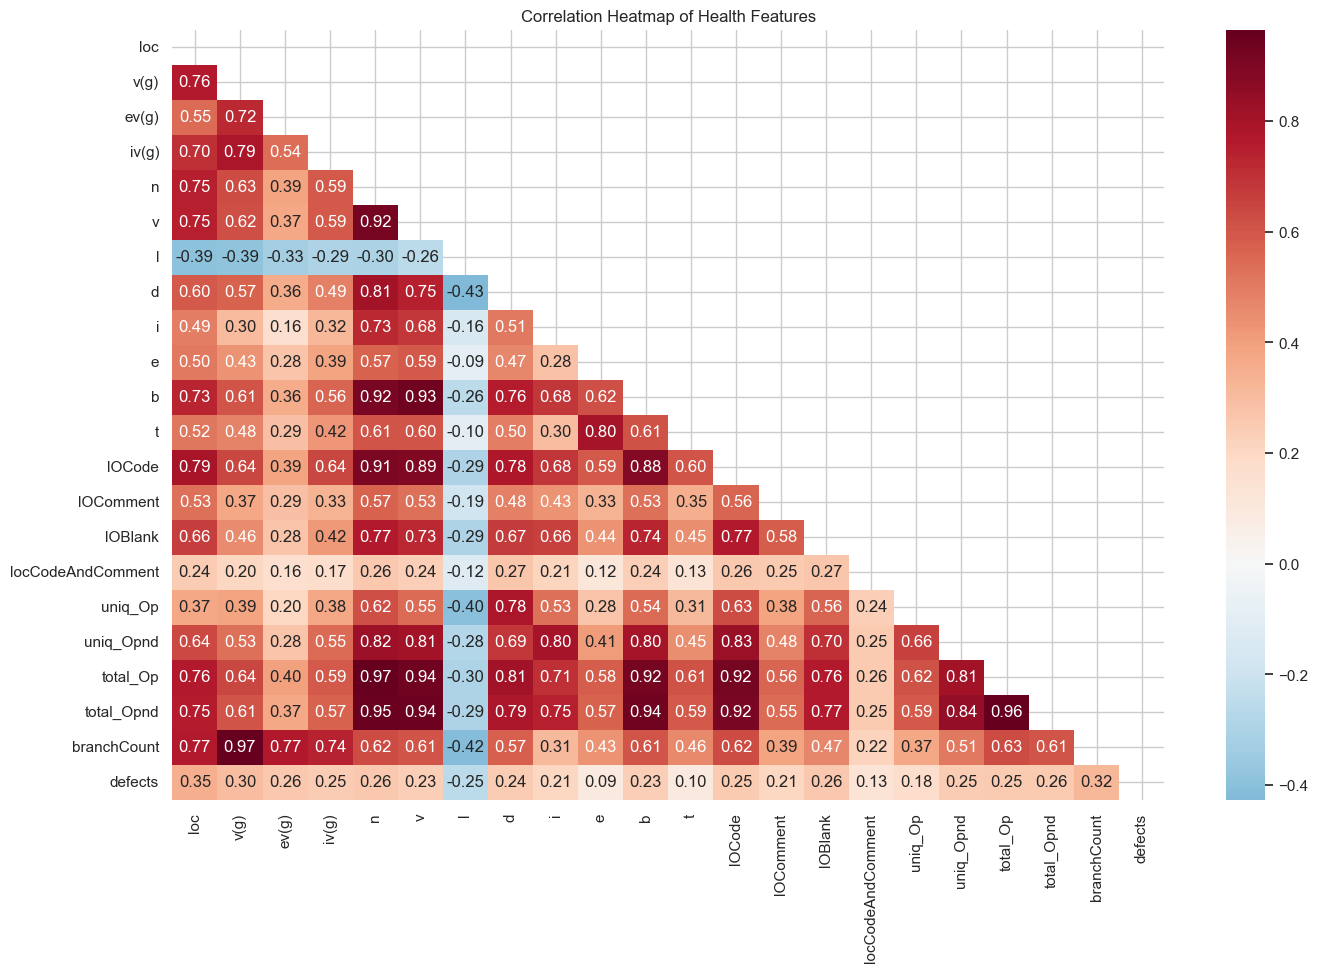

In [25]:
corr_matrix = df.drop(columns=['id']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title("Correlation Heatmap of Health Features")
plt.show()